![Sartorious](https://storage.googleapis.com/kaggle-competitions/kaggle/30201/logos/thumb76_76.png?t=2021-09-03-15-27-57)

If you find this notebook useful, do give me an upvote, it helps to keep up my motivation. This notebook will be updated frequently so keep checking for furthur developments.

Checkout my blog for detailed explanation of this notebook - [Detect single neuronal cells in microscopy images](https://medium.com/@samyukthamantri/detect-single-neuronal-cells-in-microscopy-images-%EF%B8%8F-48b20f072a48)

# Sartorius - Cell Instance Segmentation 👩🏻‍🔬

### Detect single neuronal cells in microscopy images

Neurological disorders, including neurodegenerative diseases such as Alzheimer's and brain tumors, are a leading cause of death and disability across the globe. However, it is hard to quantify how well these deadly disorders respond to treatment. One accepted method is to review neuronal cells via light microscopy, which is both accessible and non-invasive. Unfortunately, segmenting individual neuronal cells in microscopic images can be challenging and time-intensive. Accurate instance segmentation of these cells—with the help of computer vision—could lead to new and effective drug discoveries to treat the millions of people with these disorders.


Current solutions have limited accuracy for neuronal cells in particular. In internal studies to develop cell instance segmentation models, the neuroblastoma cell line SH-SY5Y consistently exhibits the lowest precision scores out of eight different cancer cell types tested. This could be because neuronal cells have a very unique, irregular and concave morphology associated with them, making them challenging to segment with commonly used mask heads.

![Cell segmentation](https://www.marktechpost.com/wp-content/uploads/2021/10/3d-medical-background-with-virus-cells-dna-strand-scaled.jpg)

Sartorius is a partner of the life science research and the biopharmaceutical industry. They empower scientists and engineers to simplify and accelerate progress in life science and bioprocessing, enabling the development of new and better therapies and more affordable medicine. They're a magnet and dynamic platform for pioneers and leading experts in the field. They bring creative minds together for a common goal: technological breakthroughs that lead to better health for more people.

In this competition, you’ll detect and delineate distinct objects of interest in biological images depicting neuronal cell types commonly used in the study of neurological disorders. More specifically, you'll use phase contrast microscopy images to train and test your model for instance segmentation of neuronal cells. Successful models will do this with a high level of accuracy.

If successful, you'll help further research in neurobiology thanks to the collection of robust quantitative data. Researchers may be able to use this to more easily measure the effects of disease and treatment conditions on neuronal cells. As a result, new drugs could be discovered to treat the millions of people with these leading causes of death and disability.



# What is Neural Cell Segmentation ?

Neural cell instance segmentation, which aims at joint detection and segmentation of every neural cell in a microscopic image, is essential to many neuroscience applications. The challenge of this task involves cell adhesion, cell distortion, unclear cell contours, low-contrast cell protrusion structures, and background impurities. Consequently, current instance segmentation methods generally fall short of precision. 

Accurate cell counting provides key quantitative feedback and plays key roles in biological research as well as in industrial and biomedical applications. Unfortunately, the commonly used manual counting method is time-intensive, poorly standardized, and non-reproducible.

![Cell Detection and Segmentation](https://msquareprojects.in/wp-content/uploads/2021/06/screenshot.gif) Fig : Cell Detection and Segmentation

The straightforward approach for determining cell counts is to develop an object detection and segmentation model, which incorporates key determining characteristic combinations of morphological features such as cell size, color value, and cell spacing. Object detection and segmentation have been an import research focus in the computer vision field and many popular algorithms have been proposed in recent years such as Fast R-CNN, YOLO, and U-Net. While biological image analysis has entered the era of artificial intelligence with the utilization of approaches such as computer vision methods and deep convolutional networks because segmenting small objects is a notoriously difficult problem.

#MedicalImageAnalysis

# About the dataset

**Data Description**

In this competition we are segmenting neuronal cells in images. The training annotations are provided as run length encoded masks, and the images are in PNG format. The number of images is small, but the number of annotated objects is quite high. The hidden test set is roughly 240 images.

Note: while predictions are not allowed to overlap, the training labels are provided in full (with overlapping portions included). This is to ensure that models are provided the full data for each object. Removing overlap in predictions is a task for the competitor.

**Files**

    train.csv - IDs and masks for all training objects. None of this metadata is provided for the test set.

    id - unique identifier for object

    annotation - run length encoded pixels for the identified neuronal cell

    width - source image width

    height - source image height

    cell_type - the cell line

    plate_time - time plate was created

    sample_date - date sample was created

    sample_id - sample identifier

    elapsed_timedelta - time since first image taken of sample

    sample_submission.csv - a sample submission file in the correct format

    train - train images in PNG format

    test - test images in PNG format. Only a few test set images are available for download; the remainder can only be accessed by your notebooks when you submit.

    train_semi_supervised - unlabeled images offered in case you want to use additional data for a semi-supervised approach.

    LIVECell_dataset_2021 - A mirror of the data from the LIVECell dataset. LIVECell is the predecessor dataset to this competition. You will find extra data for the SH-SHY5Y cell line, plus several other cell lines not covered in the competition dataset that may be of interest for transfer learning.

# EDA :

<span style='color:purple'> Let's load the data and look at some images in the dataset </span>

In [1]:
import pandas as pd 

train_data = pd.read_csv('../input/sartorius-cell-instance-segmentation/train.csv')

samplesub = pd.read_csv('../input/sartorius-cell-instance-segmentation/sample_submission.csv')
print('Training set shape',train_data.shape)
train_data.head(5)

Training set shape (73585, 9)


,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


### Train dataset information

In [2]:
# Train dataset information

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73585 entries, 0 to 73584
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 73585 non-null  object
 1   annotation         73585 non-null  object
 2   width              73585 non-null  int64 
 3   height             73585 non-null  int64 
 4   cell_type          73585 non-null  object
 5   plate_time         73585 non-null  object
 6   sample_date        73585 non-null  object
 7   sample_id          73585 non-null  object
 8   elapsed_timedelta  73585 non-null  object
dtypes: int64(2), object(7)
memory usage: 5.1+ MB


### Uniqueness of  train data

In [3]:
train_data.nunique()

id                     606
annotation           73470
width                    1
height                   1
cell_type                3
plate_time               8
sample_date             18
sample_id              403
elapsed_timedelta        8
dtype: int64

###  Different cell types

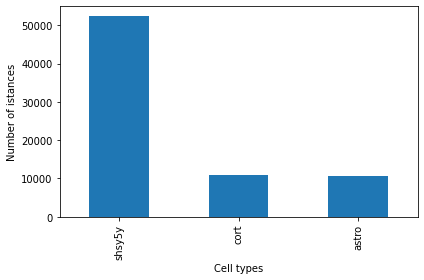

In [4]:
# Different cell types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
train_data.cell_type.value_counts().plot.bar()
ax.set_ylabel('Number of istances')
ax.set_xlabel('Cell types',rotation=0)
fig.tight_layout()
plt.show()

The shsy5y is the highest cell type followed by cort cells. Astro is the least occuring cell type.

### Images in each directory

In [5]:
# A class to access parameters and paths for the images

import tqdm
import os
from termcolor import colored

class config:
    dir = "../input/sartorius-cell-instance-segmentation"
    train_path = dir + '/train'
    test_path = dir +'/test'

# A py method to join image dir path and fnames as a list
def getImagePath(path):
    image_names = []
    for dirn, _, fnames in os.walk(path):
        for fname in fnames:
            fullpath = os.path.join(dirn, fname)
            #print(fullpath)
            image_names.append(fullpath)
    return image_names

train_im_path = getImagePath(config.train_path)
test_im_path = getImagePath(config.test_path)

print('Files in test path \n',test_im_path[0:5],'\n')   

print('No. of images in train and test dir\n',
      'Train images :',colored(len(train_im_path),'blue'),'\n'
     'Test images:',colored(len(test_im_path),'green'))

Files in test path 
 ['../input/sartorius-cell-instance-segmentation/test/7ae19de7bc2a.png', '../input/sartorius-cell-instance-segmentation/test/d8bfd1dafdc4.png', '../input/sartorius-cell-instance-segmentation/test/d48ec7815252.png'] 

No. of images in train and test dir
 Train images : 606 
Test images: 3


### Distribution plots

In [6]:
import plotly.express as px
def dist_plot(x):
    fig = px.histogram(train_data, x = x)
    fig.show()

dist_plot('cell_type')

In [7]:
dist_plot('plate_time')

Highest Plate time is 11 h

In [8]:
import cv2
def im_show(im_paths, r, c):
    fig, ax = plt.subplots(nrows = r, ncols = c, 
                          figsize = (16,8))
    for p, im_path in enumerate(im_paths):
        im = cv2.imread(im_path)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        try:
            
            ax.ravel()[p].imshow(im)
            ax.ravel()[p].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()
    


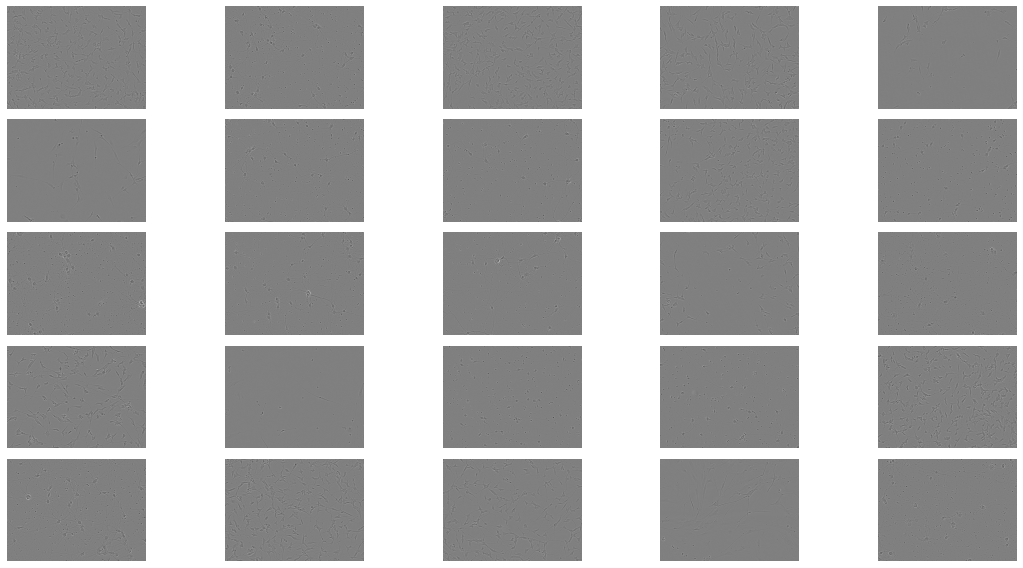

In [9]:
im_show(train_im_path[0:60],5,5)

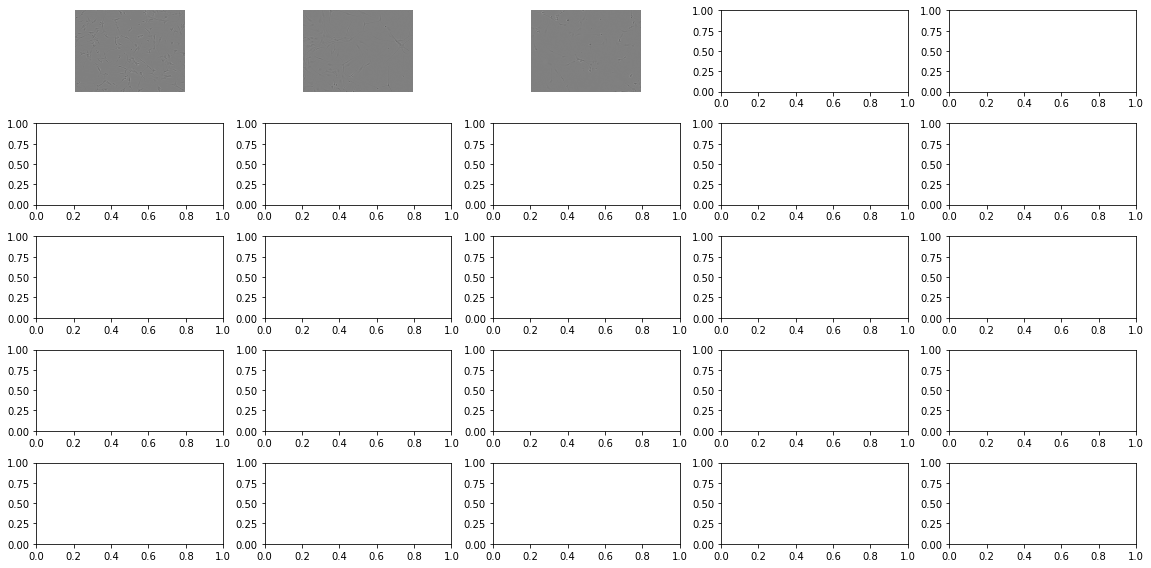

In [10]:
im_show(test_im_path[0:60],5,5)

> It's time to look at the images and the masks now. The figure below shows randomly selected images corresponding to each of the three distinct cell types. Each cell type has its own unique morphological properties.

* astro instances are the biggest in shape. They cover a lot of space in the masks.
* cort instances are smaller than the other cell types in general and they are in circle-like shapes. They don't cover much space in the masks.
* shsy5y instances are slightly bigger, elongated and more abundant than the cort instances. They cover more space than the cort cells.

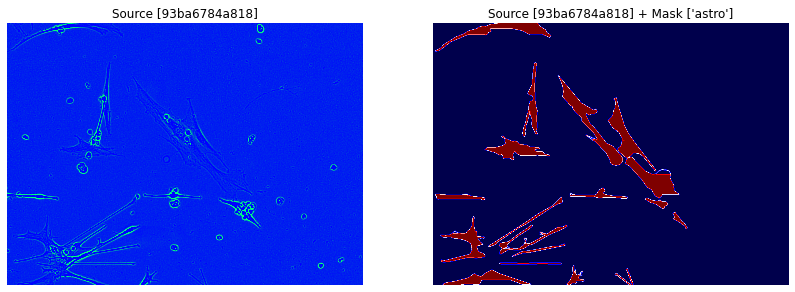

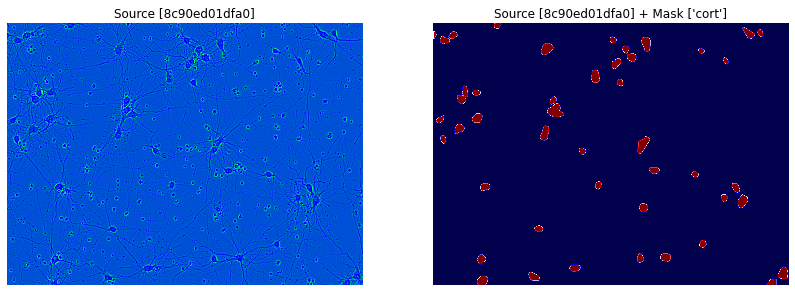

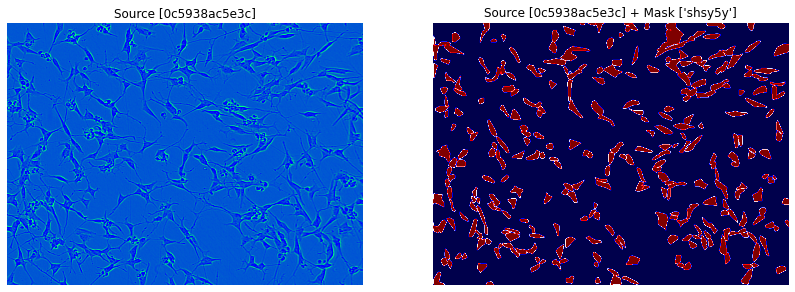

In [11]:
import numpy as np
def make_mask(mask_files, image_shape=(520, 704), color=False):
    mask = np.zeros(image_shape).ravel()
    for i, mask_file in enumerate(mask_files):
        couples = np.array(mask_file.split()).reshape(-1, 2).astype(int)
        couples[:, 1] = couples[:, 0] + couples[:, 1]
        for couple in couples:
            if color:
                mask[couple[0]: couple[1]] = i
            else:
                mask[couple[0]: couple[1]] = 1
    mask = mask.reshape(520, 704)
    return mask

def plot_image(image_id='0030fd0e6378'):
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    cell_type = df_train.loc[df_train['id'] == image_id, 'cell_type'][0:1].values
    
    file_name = os.path.join(
        '../input/sartorius-cell-instance-segmentation',
        'train', image_id + '.png')
    image = plt.imread(file_name)
    mask_files = df_train.loc[df_train['id'] == image_id, 'annotation']
    mask = make_mask(mask_files)

    ax[0].imshow(
        image,
        cmap = plt.get_cmap('winter'), 
        origin = 'upper',
        vmax = np.quantile(image, 0.99),
        vmin = np.quantile(image, 0.05)
    )
    ax[0].set_title(f'Source [{image_id}]')
    ax[0].axis('off')
    
    ax[1].imshow(
        image,
        cmap = plt.get_cmap('winter'), 
        origin = 'upper',
        vmax = 255,
        vmin = 0)
    ax[1].imshow(mask, alpha=1, cmap=plt.get_cmap('seismic'))
    ax[1].set_title(f'Source [{image_id}] + Mask {cell_type}')
    ax[1].axis('off')
    plt.show()

df_train = train_data

select_image_ids = []
select_image_ids.append(df_train.loc[df_train['cell_type'] == 'astro', 'id'].sample(1).to_list()[0])
select_image_ids.append(df_train.loc[df_train['cell_type'] == 'cort', 'id'].sample(1).to_list()[0])
select_image_ids.append(df_train.loc[df_train['cell_type'] == 'shsy5y', 'id'].sample(1).to_list()[0])

for image_id in select_image_ids:
    plot_image(image_id)

# Image segmentation with CNN

In [12]:
im_ht, im_width, im_channels = 520, 704, 1

train_ids = train_data['id'].unique().tolist()
test_ids = samplesub['id'].unique().tolist()


x_train = np.zeros((train_data['id'].nunique(),im_ht, im_width, im_channels), dtype = np.uint8)
y_train = np.zeros((train_data['id'].nunique(),im_ht, im_width, im_channels), dtype = np.uint8)
x_test = np.zeros((samplesub['id'].nunique(),im_ht, im_width, im_channels), dtype = np.uint8)

In [13]:
from tqdm import tqdm

TRAIN_PATH = '../input/sartorius-cell-instance-segmentation/train/'
# https://www.kaggle.com/c/sartorius-cell-instance-segmentation/discussion/291627
def rle_decode(mask_rle, shape=(520, 704, 1)):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)  # Needed to align to RLE direction

def rle_encode(img):
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = cv2.imread(path + '.png')[:,:]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32) -125
    img = np.expand_dims(img, axis = 2)
    x_train[n] = img
    
    labels = train_data[train_data["id"]
                        == id_]["annotation"].tolist()
    mask = np.zeros((520, 704, 1))
    for label in labels:
        mask += rle_decode(label, shape=(520, 704, 1))
    mask = mask.clip(0, 1)

    y_train[n] = mask
print("Done")

100%|██████████| 606/606 [00:51<00:00, 11.88it/s]

Done


In [14]:
# Get and resize test images
test_images_id = []
X_test = np.zeros((samplesub['id'].nunique(), im_ht, im_width, im_channels), dtype=np.uint8)
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TRAIN_PATH.replace('train', 'test') + id_
    img = cv2.imread(path + '.png')[:,:]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32) -125
    img = np.expand_dims(img, axis = 2)
    X_test[n] = img
    test_images_id.append(id_)
print("Done")

100%|██████████| 3/3 [00:00<00:00, 98.48it/s]

Done


In [15]:
import keras
from keras.models import Model,load_model
from keras import layers
from tensorflow.keras.losses import BinaryCrossentropy

model = keras.Sequential([
    keras.layers.Conv2D(filters = 20,kernel_size=5, strides = 1,
                       padding = 'same',activation ='relu',
                       input_shape = [im_ht, im_width, im_channels]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=10, kernel_size=5, strides = 1,
                       padding = 'same',activation ='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=1, kernel_size=1),
])

model.compile(optimizer = 'adam', loss = BinaryCrossentropy(),metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 520, 704, 20)      520       
_________________________________________________________________
batch_normalization (BatchNo (None, 520, 704, 20)      80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 520, 704, 10)      5010      
_________________________________________________________________
batch_normalization_1 (Batch (None, 520, 704, 10)      40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 520, 704, 1)       11        
Total params: 5,661
Trainable params: 5,601
Non-trainable params: 60
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'


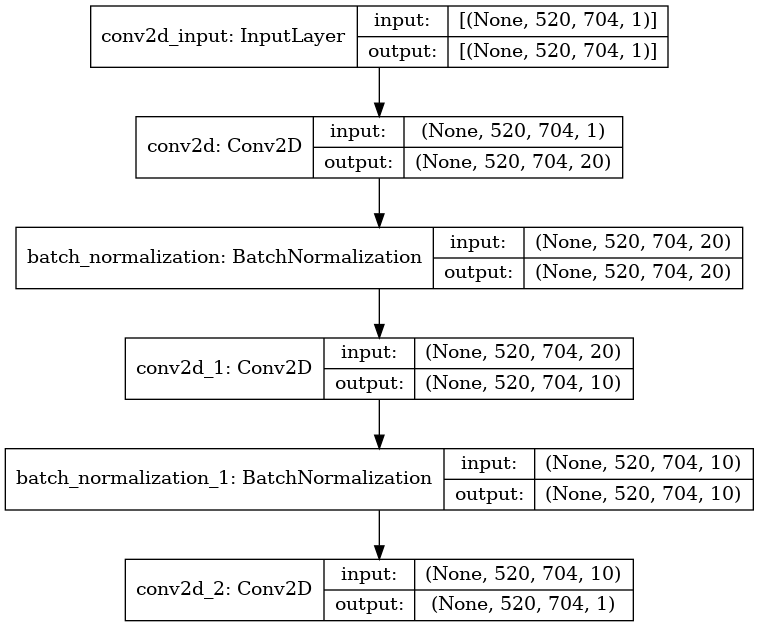

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes = True)

In [17]:
from keras.callbacks import EarlyStopping
# Save the best models and its weights at every step 

model_output = os.path.join('./','model.h5')
model_checkpoint = keras.callbacks.ModelCheckpoint(
    model_output,save_best_only = True, save_weights_only = True)

# Reduces the learning rate for no model improvement
lr_reduce = keras.callbacks.ReduceLROnPlateau( monitor='val_loss', factor=0.1, patience=10, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

es =  EarlyStopping(patience = 10, verbose = 1)

hist = model.fit(x_train, y_train, batch_size = 65, 
                 validation_steps=0.5,
                 
                 epochs = 5,callbacks = [EarlyStopping(), model_checkpoint, lr_reduce])


2022-04-24 10:38:00.332553: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
10/10 [==============================] - 188s 18s/step - loss: 2.5211 - accuracy: 0.7497
Epoch 2/5
10/10 [==============================] - 187s 18s/step - loss: 1.6122 - accuracy: 0.6827
Epoch 3/5
10/10 [==============================] - 183s 18s/step - loss: 1.1764 - accuracy: 0.8075
Epoch 4/5
10/10 [==============================] - 185s 18s/step - loss: 0.9310 - accuracy: 0.8863
Epoch 5/5
10/10 [==============================] - 184s 18s/step - loss: 0.8171 - accuracy: 0.8958


(606, 520, 704, 1) (606, 520, 704, 1)
(606, 520, 704, 1)


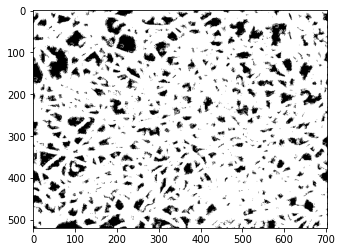

In [18]:
print(x_train.shape, y_train.shape)
pred = model.predict(x_train)
print(pred.shape)
train_preds = (pred > 0.5).astype(np.uint8)
plt.imshow(train_preds[0],cmap = 'gray')


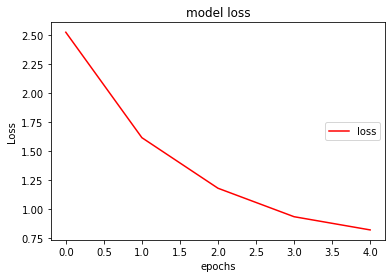

In [19]:
# Plot model loss
loss = hist.history['loss']

plt.figure()
plt.plot(hist.epoch, loss, 'r', label='Training loss')

plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['loss'],loc = 'right')
plt.show()

1/1 [==============================] - 0s 238ms/step
1


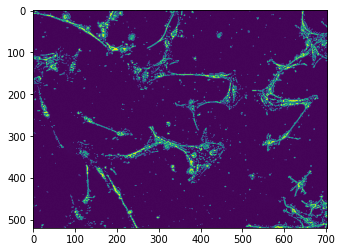

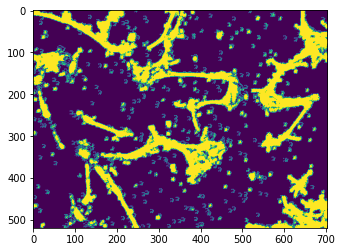

In [20]:
# Ref: https://www.kaggle.com/carlosgut/sartorius-simple-cnn-keras
preds_test = model.predict(X_test, verbose=1)
preds_test_t = (preds_test >= 0.5).astype(np.uint8)
# Test samples
from random import randint
ix = randint(0, len(preds_test_t)-1)
print(ix)
plt.imshow(X_test[ix])
plt.show()
plt.imshow(np.squeeze(preds_test_t[ix]))
plt.show()

<iframe width="1424" height="594" src="https://www.youtube.com/embed/pFsPZe_vpO0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>